Ajay Kumar Saravanan - 52231505

DATA422-23S2: Data Wrangling

Notebook to Create Visualisations for Analysis

**Importing Libraries**

In [ ]:
# Load the necessary libraries
library(ggplot2)
library(dplyr)
library(tidyverse)

install.packages("gridExtra")
library(gridExtra)

install.packages("ggthemes")
library(ggthemes)

install.packages("ggrepel")
library(ggrepel)

install.packages("maps")
install.packages("mapproj")

install.packages("scales")
library(scales)

**Reading and Aggregating Data**

After reading the data, we aggregate it to get the total number of cases for each region.

In [2]:
# Read the data
data <- read.csv("Cleaned_data.csv")

# Aggregate data to get total cases per region
agg_data <- aggregate(data$Cases, by=list(Region=data$Region), sum)
colnames(agg_data) <- c("Region", "Cases")

head(agg_data, 5)

,Region,Cases
,<chr>,<int>
1,Caribbean,2567119
2,Central America,12011914
3,Central Asia,1783655
4,Eastern Africa,2684786
5,Eastern Asia,171579058


**Computing Average Population Density per Region**

Next, we aim to determine the average population density for each region. This will give us an insight into how densely populated each region is, which could be a valuable context when analyzing the spread of cases:

In [3]:
# Compute average population density per region
avg_density <- aggregate(data$Pop.density.per.km2.2021, by=list(Region=data$Region), mean)
colnames(avg_density) <- c("Region", "AvgDensity")


head(avg_density, 5)

,Region,AvgDensity
,<chr>,<dbl>
1,Caribbean,296.3091
2,Central America,109.3500
3,Central Asia,40.8200
4,Eastern Africa,194.4353
5,Eastern Asia,4351.0429


**Merging the Datasets**

In [4]:
# Merge the datasets
final_data <- merge(agg_data, avg_density, by="Region")

head(final_data, 5)

,Region,Cases,AvgDensity
,<chr>,<int>,<dbl>
1,Caribbean,2567119,296.3091
2,Central America,12011914,109.3500
3,Central Asia,1783655,40.8200
4,Eastern Africa,2684786,194.4353
5,Eastern Asia,171579058,4351.0429


**Visualising Cases per Region with Population Density Heatmap**

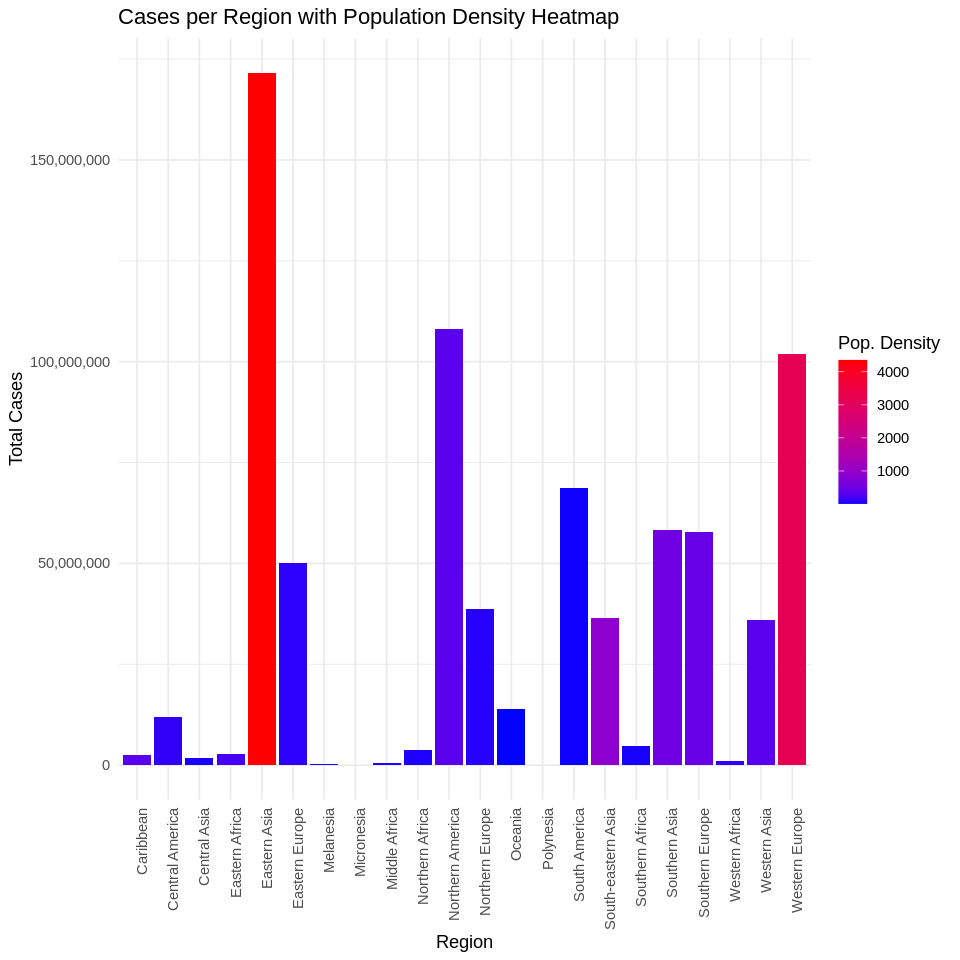

In [7]:
options(repr.plot.width=8, repr.plot.height=8)

ggplot(final_data, aes(x=Region, y=Cases, fill=AvgDensity)) +
  geom_bar(stat="identity") +
  scale_fill_gradient(low="blue", high="red") +
  labs(title="Cases per Region with Population Density Heatmap",
       x="Region",
       y="Total Cases",
       fill="Pop. Density") +
  scale_y_continuous(labels = comma) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

**Investigating countries in Eastern Asia**

In [8]:
countries <- data %>%
    filter(Region == "Eastern Asia") %>%
    select(Country, Cases, Deaths, Vaccinated, Population.000.2021) %>%
    distinct()

countries

Country,Cases,Deaths,Vaccinated,Population.000.2021
<chr>,<int>,<int>,<int>,<int>
Hong Kong,2876106,13466,6917355,7553
South Korea,34571873,35934,44784499,51305
Mongolia,1011116,2284,2272965,3329
Japan,33803572,74694,104705133,126051
Macau,3514,121,679703,658
China,99312876,121714,1310292000,1444216
North Korea,1,6,0,25887


**Creating Choropleth World Maps for Various Metrics**

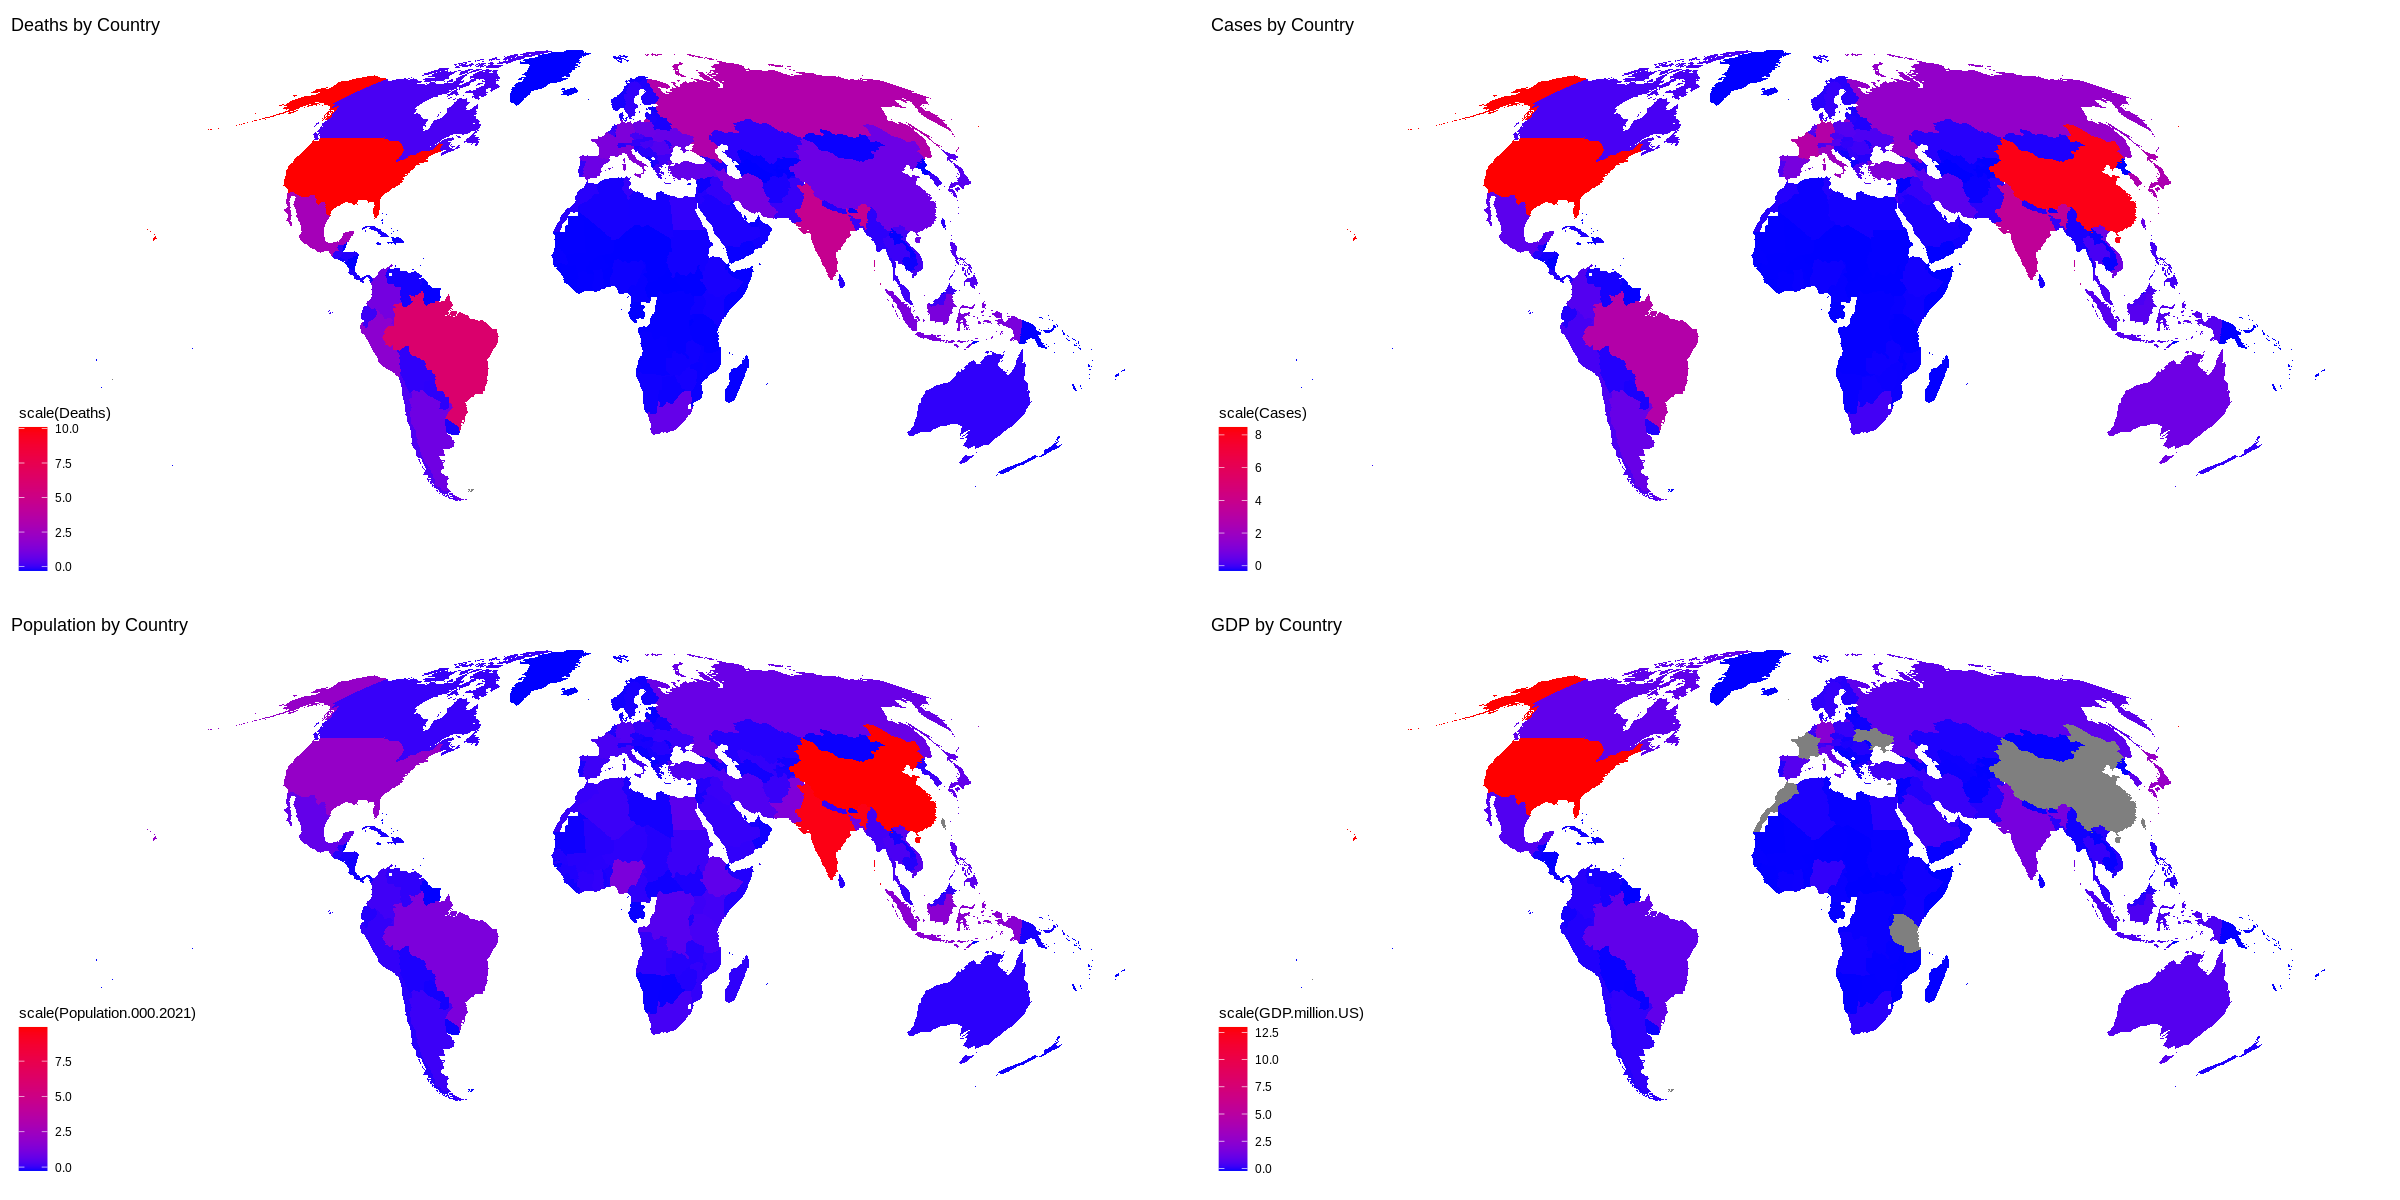

In [9]:
# Creating the Choropleth World Map
world_map = map_data("world") %>%
  filter(! long > 180)

# Replacing country names that are incompatible with the ggthemes package
data <- data %>%
  mutate(Country = replace(Country, Country == "United States", "USA"))

# Creating the plots
map1 <- data %>%
  ggplot(aes(fill = scale(Deaths), map_id = Country)) +
  geom_map(map = world_map) +
  expand_limits(x = world_map$long, y = world_map$lat) +
  coord_map("moll") +
  scale_fill_gradient(low = "blue", high = "red", labels = scales::comma) +
  theme_map() +
  labs(title = "Deaths by Country")

map2 <- data %>%
  ggplot(aes(fill = scale(Cases), map_id = Country)) +
  geom_map(map = world_map) +
  expand_limits(x = world_map$long, y = world_map$lat) +
  coord_map("moll") +
  scale_fill_gradient(low = "blue", high = "red", labels = scales::comma) +
  theme_map() +
  labs(title = "Cases by Country")


map3 <- data %>%
  ggplot(aes(fill = scale(Population.000.2021), map_id = Country)) +
  geom_map(map = world_map) +
  expand_limits(x = world_map$long, y = world_map$lat) +
  coord_map("moll") +
  scale_fill_gradient(low = "blue", high = "red", labels = scales::comma) +
  theme_map() +
  labs(title = "Population by Country")


map4 <- data %>%
  ggplot(aes(fill = scale(GDP.million.US), map_id = Country)) +
  geom_map(map = world_map) +
  expand_limits(x = world_map$long, y = world_map$lat) +
  coord_map("moll") +
  scale_fill_gradient(low = "blue", high = "red", labels = scales::comma) +
  theme_map() +
  labs(title = "GDP by Country")

# Creating a grid for the plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(map1, map2, map3, map4, ncol=2)

**Visualising Relationship Between Variables**

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

# Removing NA values
data <- na.omit(data)

plot1 <- ggplot(data, aes(x = log(Cases), y = log(Deaths))) +
  geom_point() +
  geom_smooth(method = "lm", formula = 'y ~ x', se = FALSE, color = "blue") +
  theme_minimal()

plot2 <- ggplot(data, aes(x = log(Cases), y = log(Vaccinated))) +
  geom_point() +
  geom_smooth(method = "lm", formula = 'y ~ x', se = FALSE, color = "blue") +
  theme_minimal()

plot3 <- ggplot(data, aes(x = log(Cases), y = log(Obesity.rate))) +
  geom_point() +
  geom_smooth(method = "lm", formula = 'y ~ x', se = FALSE, color = "blue") +
  theme_minimal()

plot4 <- ggplot(data, aes(x = log(Cases), y = log(Pop.density.per.km2.2021))) +
  geom_point() +
  geom_smooth(method = "lm", formula = 'y ~ x', se = FALSE, color = "blue") +
  theme_minimal()

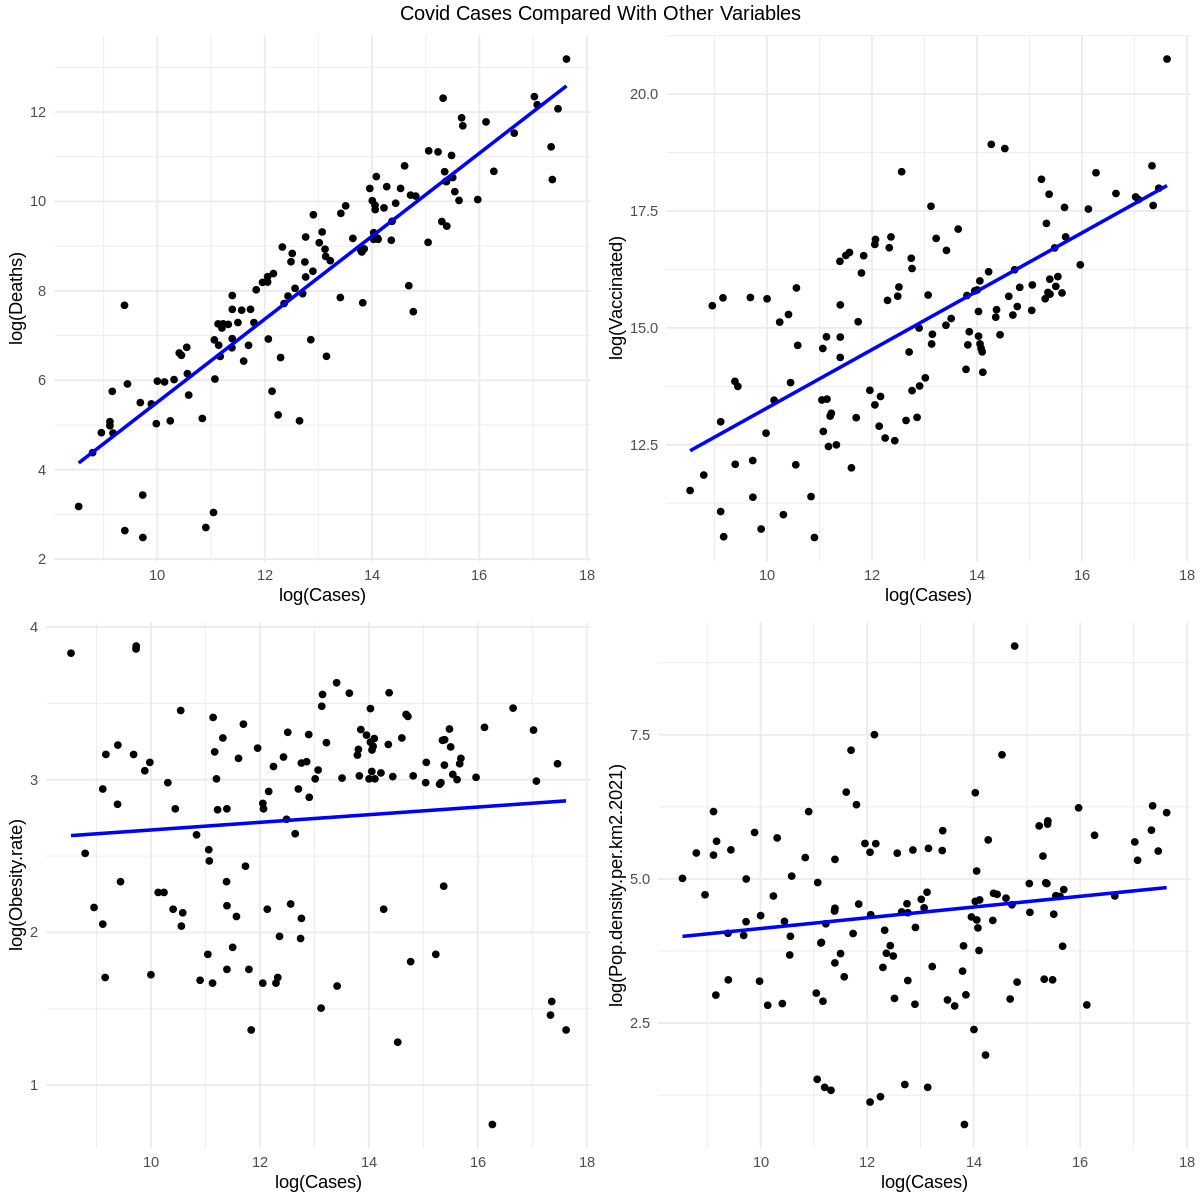

In [ ]:
grid.arrange(plot1, plot2, plot3, plot4, ncol=2, top="Covid Cases Compared With Other Variables")